# 明确概念

## 分清楚fig与axes


![](https://pic3.zhimg.com/80/v2-6e4429872eeb8a155433c0ee7c75b6ea_720w.jpg)

![](https://pic4.zhimg.com/v2-20e030544a70ba2a9bb4e073875f02db_r.jpg)



## ax与其他

![](https://pic2.zhimg.com/80/v2-124378df90b3ff1e24eb48c36af08dc9_720w.jpg)

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
pylab.mpl.rcParams['axes.unicode_minus'] = False
pylab.mpl.rcParams['font.sans-serif'] = ['SimHei']

# plt.rcParams['axes.unicode_minus']=False
# plt.rcParams['font.sans-serif'] = ['SimHei']


## figure 画布

<Figure size 432x288 with 0 Axes>

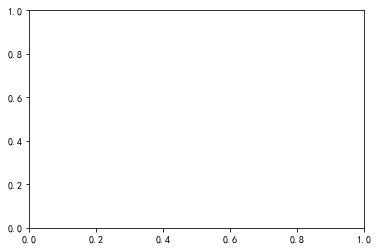

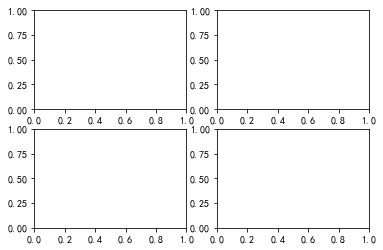

In [110]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

subfigures(
    
    nrows=1, 
    ncols=1, 
    squeeze=True, 
    wspace=None, 
    hspace=None, 
    width_ratios=None, 
    height_ratios=None, 
    **kwargs
    
    )
    增加画布个数，相同的有add_subfigure()

In [ ]:
# fig = plt.figure(constrained_layout=True, figsize=(10, 4))
# subfigs = fig.subfigures(1, 2, wspace=0.07)

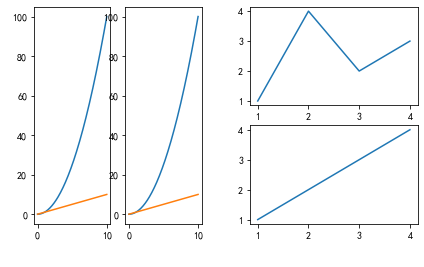

In [109]:
x = np.linspace(0,10,200)
fig = plt.figure()
sfigs = fig.subfigures(1, 2)
axsL = sfigs[0].subplots(1, 2)
# axsL.plot(x,x**2,x,x)
for ax in axsL.flat:
    ax.plot(x,x**2,x,x)

axsL = sfigs[1].subplots(2,1)
axsL[1].plot([1, 2, 3, 4], [1, 2, 3, 4])
axsL[0].plot([1, 2, 3, 4], [1, 4, 2, 3])

## axes 坐标系 

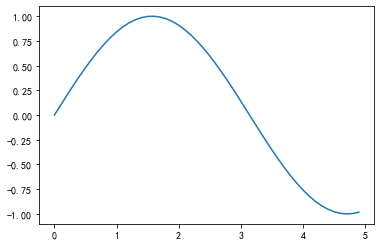

In [114]:
fig = plt.figure() #一个画布
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y) # 默认的一个坐标系

subplot(nrows, ncols, index, **kwargs)

把一个画布分为nrows*ncols个axes区域分布坐标系，index进行排序，从上到下，从左到右。

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

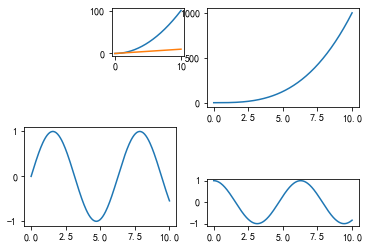

In [39]:
fig = plt.figure()    #创建一个新的图像
plt.subplot(4,4,2)  #给图像划分区域
x = np.linspace(0,10,200)
plt.plot(x,x**2,x,x)
plt.subplot(2,2,2)
plt.plot(x,x**3)
plt.subplot(2,2,3)
plt.plot(x,np.sin(x))
plt.subplot(4,2,8)
plt.plot(x,np.cos(x))
plt.show()

如果要更复杂的布局，则需要利用网格来布局


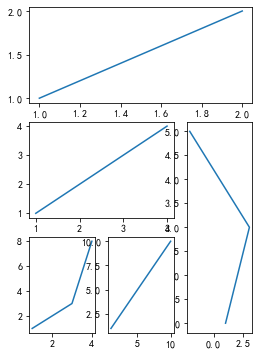

In [46]:
import matplotlib.gridspec as gridspec#调用网格

fig=plt.figure(num=1,figsize=(4,6))#创建画布
gs=gridspec.GridSpec(3,3)#设定网格

ax1=fig.add_subplot(gs[0,:])#选定网格-第0行全部
ax1.plot([1,2],[1,2])

ax2=fig.add_subplot(gs[1,:-1])# 第1行的0到﹣1的文字
ax2.plot([1,2,3,4],[1,2,3,4])

ax3=fig.add_subplot(gs[1:,-1])
ax3.plot([1,2,3,-2],[1,2,3,5])

ax4=fig.add_subplot(gs[2,0])
ax4.plot([1,2,3,4],[1,2,3,8])

ax5=fig.add_subplot(gs[2,1])
ax5.plot([1,2,3,10],[1,2,3,10])

plt.show()

设置坐标系axes

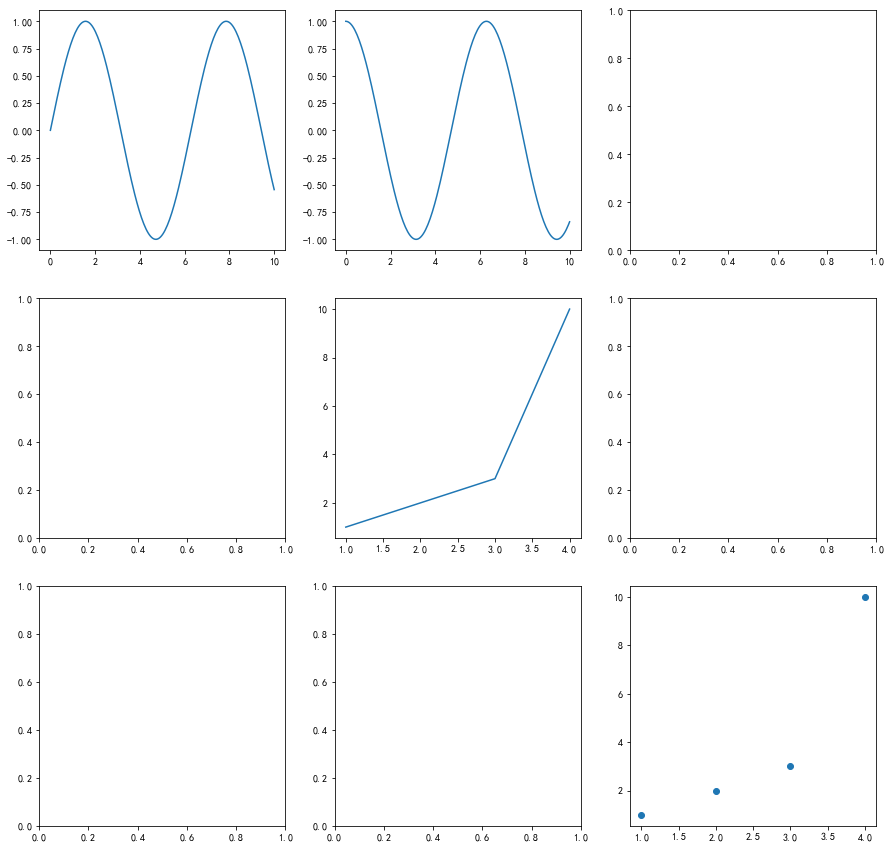

In [86]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
ax[1,1].plot([1,2,3,4],[1,2,3,10])
ax[2,2].scatter([1,2,3,4],[1,2,3,10])
ax[0,0].plot(x,np.sin(x))
ax[0,1].plot(x,np.cos(x))



Text(0.1, 0.5, 'Width: 2\nHeight: 1')

Text(0.1, 0.5, 'Width: 3\nHeight: 1')

Text(0.1, 0.5, 'Width: 1.5\nHeight: 1')

Text(0.1, 0.5, 'Width: 2\nHeight: 3')

Text(0.1, 0.5, 'Width: 3\nHeight: 3')

Text(0.1, 0.5, 'Width: 1.5\nHeight: 3')

Text(0.1, 0.5, 'Width: 2\nHeight: 2')

Text(0.1, 0.5, 'Width: 3\nHeight: 2')

Text(0.1, 0.5, 'Width: 1.5\nHeight: 2')

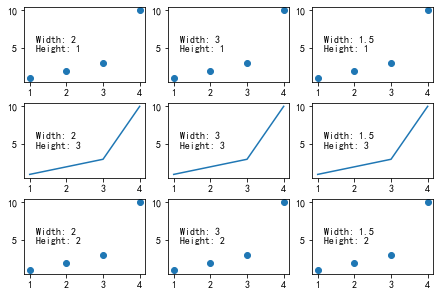

In [137]:
## 通过循环使用每个坐标系

### 第一种 for range()

# fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
# for i in axs.flat:
    
#     if i %2:
#         axs[i,j].plot([1,2,3,4],[1,2,3,10])
#     else:
#         axs[i].scatter([1,2,3,4],[1,2,3,10])

fig5 = plt.figure(constrained_layout=True)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec5 = fig5.add_gridspec(ncols=3, nrows=3)

for row in range(3):
    for col in range(3):
        if row%2:
        
            ax = fig5.add_subplot(spec5[row, col])
            label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
            ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')
            ax.plot([1,2,3,4],[1,2,3,10])
        else:

            ax = fig5.add_subplot(spec5[row, col])
            label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
            ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')
            ax.scatter([1,2,3,4],[1,2,3,10])
outer_grid = fig11.add_gridspec(3, 4, wspace=0, hspace=0)


0 0 AxesSubplot(0.125,0.628333;0.258333x0.251667)


[[], []]

0 1 AxesSubplot(0.383333,0.628333;0.258333x0.251667)


[[], []]

0 2 AxesSubplot(0.641667,0.628333;0.258333x0.251667)


[[], []]

1 0 AxesSubplot(0.125,0.376667;0.258333x0.251667)


[[], []]

1 1 AxesSubplot(0.383333,0.376667;0.258333x0.251667)


[[], []]

1 2 AxesSubplot(0.641667,0.376667;0.258333x0.251667)


[[], []]

2 0 AxesSubplot(0.125,0.125;0.258333x0.251667)


[[], []]

2 1 AxesSubplot(0.383333,0.125;0.258333x0.251667)


[[], []]

2 2 AxesSubplot(0.641667,0.125;0.258333x0.251667)


[[], []]

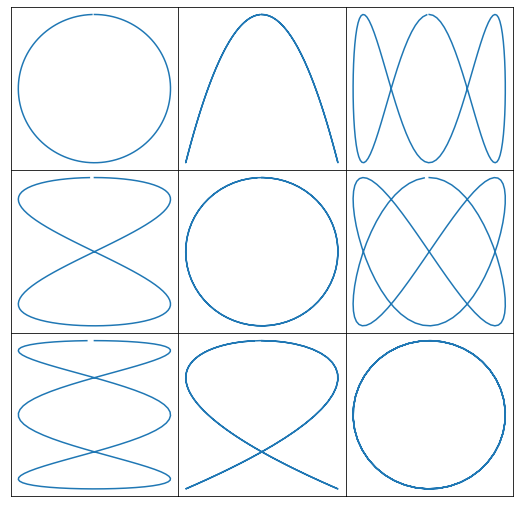

In [143]:
### 第二种  for np.ndenumerate(axs):

def squiggle_xy(a, b, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a),np.cos(i*b)

fig11 = plt.figure(figsize=(9, 9), constrained_layout=False)
outer_grid = fig11.add_gridspec(3, 3, wspace=0, hspace=0)
axs = outer_grid.subplots()  # Create all subplots for the inner grid.
for (a, b), ax in np.ndenumerate(axs):

    print(a,b,ax)
    ax.plot(*squiggle_xy(a + 1, b + 1))
    ax.set(xticks=[], yticks=[])

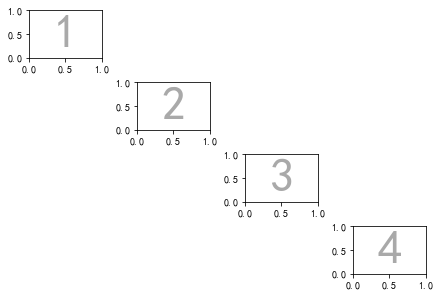

In [133]:
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : Dict[str, Axes]
        Mapping between the title / label and the Axes.

    fontsize : int, optional
        How big the label should be
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

        
layout = np.zeros((4, 4), dtype=int)
for j in range(4):
    layout[j, j] = j + 1
axd = plt.figure(constrained_layout=True).subplot_mosaic(
    layout, empty_sentinel=0
)
identify_axes(axd)

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

[[], []]

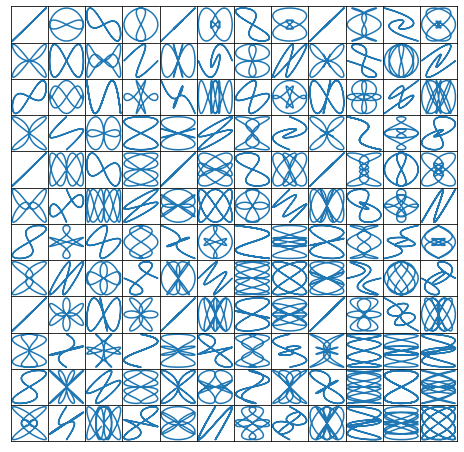

In [140]:
import numpy as np


def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)


fig11 = plt.figure(figsize=(8, 8), constrained_layout=False)
outer_grid = fig11.add_gridspec(4, 4, wspace=0, hspace=0)

for a in range(4):
    for b in range(4):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 3, wspace=0, hspace=0)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for (c, d), ax in np.ndenumerate(axs):
            ax.plot(*squiggle_xy(a + 1, b + 1, c + 1, d + 1))
            ax.set(xticks=[], yticks=[])

# show only the outside spines
for ax in fig11.get_axes():
    ax.spines['top'].set_visible(ax.get_subplotspec().is_first_row())
    ax.spines['bottom'].set_visible(ax.get_subplotspec().is_last_row())
    ax.spines['left'].set_visible(ax.get_subplotspec().is_first_col())
    ax.spines['right'].set_visible(ax.get_subplotspec().is_last_col())

plt.show()

## Layout

使用各自的参数 subplots() 或 figure() ，例如：

plt.subplots(constrained_layout=True)


通过激活它 rcParams ，比如：

plt.rcParams['figure.constrained_layout.use'] = True


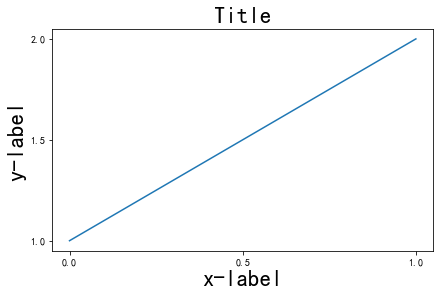

In [122]:
def example_plot(ax, fontsize=12, hide_labels=False):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    if hide_labels:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    else:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)

fig, ax = plt.subplots(constrained_layout=True)
example_plot(ax, fontsize=23)

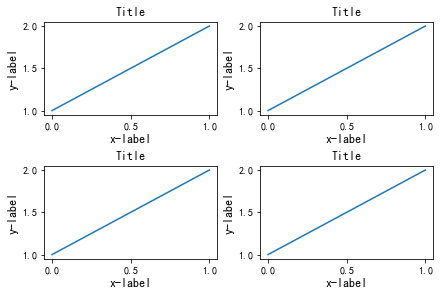

In [125]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
for ax in axs.flat:
    example_plot(ax)

# 未完待续

In [ ]:
%matplotlib inline
A = np.arange(1,5)
B = A**2
C = A**3

In [17]:
ax.set_title('Title',fontsize=18)
ax.set_xlabel('xlabel', fontsize=18,fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
ax.legend()

Text(0.5, 1.0, 'Title')

Text(0.5, 0, 'xlabel')

Text(0, 0.5, 'ylabel')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [18]:
ax.xaxis.set_tick_params(rotation=45,labelsize=18,colors='w') 
start, end = ax.get_xlim() 
ax.xaxis.set_ticks(np.arange(start, end,1)) 
ax.yaxis.tick_right()

<Figure size 432x288 with 0 Axes>

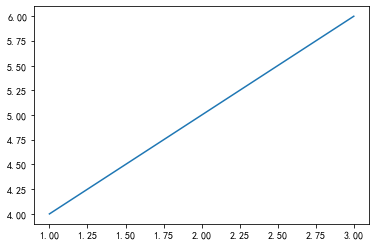

In [20]:
# 第一种方式
plt.figure()
plt.plot([1,2,3],[4,5,6])
plt.show()

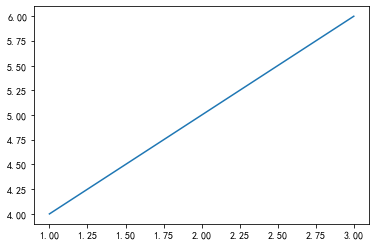

In [19]:
fig,ax = plt.subplots()
ax.plot([1,2,3],[4,5,6])
plt.show()

fig = plt.figure()    #创建一个新的图像
plt.subplot(2,2,1)  #给图像划分区域
x = np.linspace(0,10,200)
plt.plot(x,x**2,x,x)
plt.subplot(2,2,2)
plt.plot(x,x**3)
plt.subplot(2,1,2)
plt.plot(x,np.sin(x))
plt.show()